In [2]:
import pandas as pd
import os
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv(f'{os.getcwd()}/data_after_eda.csv')
del df['Unnamed: 0']

## Просмотр распределения целевой переменной и её логарифмического вида

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Сумма кассовых сборов, млрд.долл.')

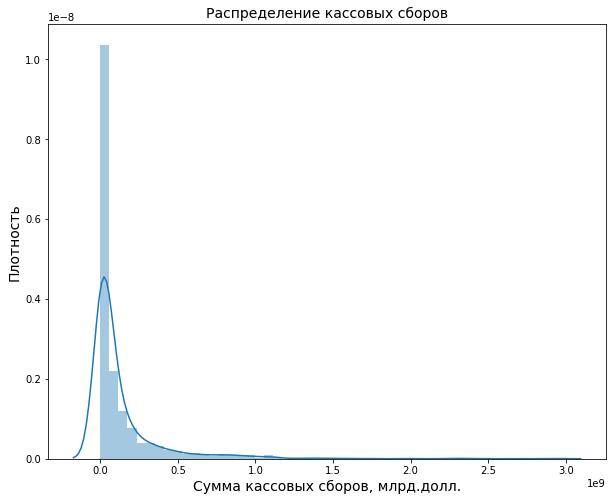

In [4]:
plt.figure(figsize=(10, 8))
sns.distplot(df.worldwide_gross)
plt.title('Распределение кассовых сборов', fontsize = 14)
plt.ylabel('Плотность', fontsize = 14)
plt.xlabel('Сумма кассовых сборов, млрд.долл.', fontsize = 14)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Логарифмическая сумма кассовых сборов')

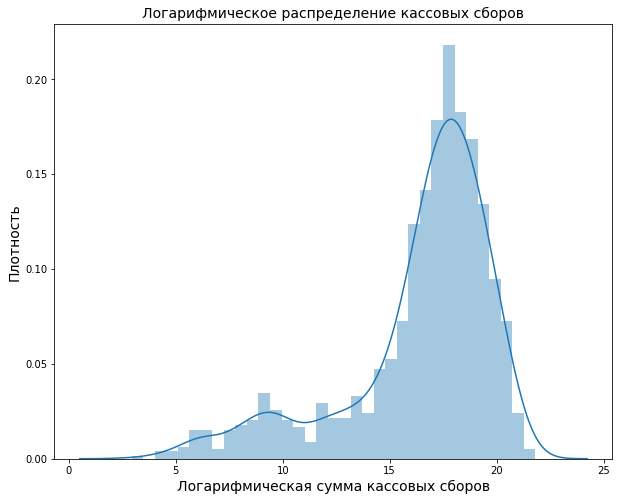

In [5]:
df = df.assign(log_wwg = np.log(df.worldwide_gross))
plt.figure(figsize=(10, 8))
sns.distplot(df.log_wwg)
plt.title('Логарифмическое распределение кассовых сборов', fontsize = 14)
plt.ylabel('Плотность', fontsize = 14)
plt.xlabel('Логарифмическая сумма кассовых сборов', fontsize = 14)

## Проверка гипотез

### Гипотеза 1: Кассовые сборы у фильмов, созданные членами съемочной команды из разных стран, выше, чем у фильмов, снятых членами съемочной командой одной страны

Данная гипотеза выдвинута на основании предположения о том, что фильмы, созданные при содействии профессионалов из нескольких стран, гораздо качественнее, чем фильмы, созданные съемочной командой одной страны, что отражается на общем уровне кассовых сборов.

Для проведения статистического теста определим среднее значение кассовых сборов в выборках, после чего проверим выборки на 
соответствие критерию нормальности и равенства дисперсий:

In [6]:
g1 = df.query('coproduction == 0')[['log_wwg', 'worldwide_gross']]  # формирование выборки 1
g2 = df.query('coproduction == 1')[['log_wwg','worldwide_gross']]  # формирование выборки 2

print('Расчёт средних значений в выборках:')
print(f'Среднее значение кассовых сборов в выборке фильмов, снятых членами съемочной команды из одной страны равна {round(g1.worldwide_gross.mean(),2)}')
print(f'Среднее значение кассовых сборов в выборке фильмов, снятых членами съемочной команды из нескольких стран равна {round(g2.worldwide_gross.mean(),2)}')
print()

print('Проверка нормальности данных в выборках по исходным суммам')
print(ss.shapiro(g1.worldwide_gross))  # проверка распределения данных на нормальность в выборке 1
print(ss.shapiro(g2.worldwide_gross))  # проверка распределения данных на нормальность в выборке 2
print()

print('Проверка нормальности данных в выборках по логарифмированным суммам')
print(ss.shapiro(g1.log_wwg))  # проверка распределения данных на нормальность в выборке 1
print(ss.shapiro(g2.log_wwg))  # проверка распределения данных на нормальность в выборке 2
print()

print('Проверка на равенство дисперсий')
print(ss.levene(g1.worldwide_gross, g2.worldwide_gross))  # проверка равенства дисперсий

Расчёт средних значений в выборках:
Среднее значение кассовых сборов в выборке фильмов, снятых членами съемочной команды из одной страны равна 100476835.93
Среднее значение кассовых сборов в выборке фильмов, снятых членами съемочной команды из нескольких стран равна 168265530.75

Проверка нормальности данных в выборках по исходным суммам
ShapiroResult(statistic=0.48320460319519043, pvalue=1.5414283107572988e-44)
ShapiroResult(statistic=0.604305624961853, pvalue=2.40415456625784e-34)

Проверка нормальности данных в выборках по логарифмированным суммам
ShapiroResult(statistic=0.8613497018814087, pvalue=4.623476787645418e-27)
ShapiroResult(statistic=0.9005172252655029, pvalue=5.558630451901618e-19)

Проверка на равенство дисперсий
LeveneResult(statistic=21.424943196649956, pvalue=4.007594147492304e-06)


Полученные результаты тестов свидетельствуют о том, что данные распределены ненормально, а дисперсии в рассматриваемых выборках неравны. Вследствие этого использование классического t-теста для определения уровня статистической значимости разниц становится  некорректным: вместо указанного теста необходимо использовать непараметрический тест Манна-Уитни:

In [7]:
ss.mannwhitneyu(g1.worldwide_gross, g2.worldwide_gross)  # проведение непараметрического теста

MannwhitneyuResult(statistic=197699.0, pvalue=8.096740516026778e-13)

**Вывод : результаты проведенного теста Манна-Уитни не позволяют принять гипотезу о том, что распределения выборок стастически значимо не отличаются, вследствие чего гипотеза № 1 подтверждается: кассовые сборы фильмов, снятых в условиях ко-продакшна, выше, чем у фильмов, снятых съемочной командой одной страны**

### Гипотеза 2: Кассовые сборы у фильмов с одним языком перевода меньше, чем у фильмов, переведенных на несколько языков

Данная гипотеза выдвинута на основании предположения о том, что фильмы, переведенные на несколько языков охватывают бОльшую аудиторию зрителей, что непосредственно отображается на общем уровне кассовых сборов.

Для проведения статистического теста определим среднее значение кассовых сборов в выборках, после чего проверим выборки на 
соответствие критерию нормальности и равенства дисперсий:

In [8]:
g1 = df.query('lang_cnt == 1')[['log_wwg', 'worldwide_gross']]  # формирование выборки 1
g2 = df.query('lang_cnt != 1')[['log_wwg','worldwide_gross']]  # формирование выборки 2

print('Расчёт средних значений в выборках:')
print(f'Среднее значение кассовых сборов в выборке фильмов с одним языком перевода равно {round(g1.worldwide_gross.mean(),2)}')
print(f'Среднее значение кассовых сборов в выборке фильмов с несколькими языками перевода равно {round(g2.worldwide_gross.mean(),2)}')
print()

print('Проверка нормальности данных в выборках по исходным суммам')
print(ss.shapiro(g1.worldwide_gross))  # проверка распределения данных на нормальность в выборке 1
print(ss.shapiro(g2.worldwide_gross))  # проверка распределения данных на нормальность в выборке 2
print()

print('Проверка нормальности данных в выборках по логарифмированным суммам')
print(ss.shapiro(g1.log_wwg))  # проверка распределения данных на нормальность в выборке 1
print(ss.shapiro(g2.log_wwg))  # проверка распределения данных на нормальность в выборке 2
print()

print('Проверка на равенство дисперсий')
print(ss.levene(g1.worldwide_gross, g2.worldwide_gross))  # проверка равенства дисперсий

Расчёт средних значений в выборках:
Среднее значение кассовых сборов в выборке фильмов с одним языком перевода равно 105946164.65
Среднее значение кассовых сборов в выборке фильмов с несколькими языками перевода равно 148473036.65

Проверка нормальности данных в выборках по исходным суммам
ShapiroResult(statistic=0.4927663207054138, pvalue=6.419628524764852e-41)
ShapiroResult(statistic=0.5762741565704346, pvalue=6.762163322682875e-39)

Проверка нормальности данных в выборках по логарифмированным суммам
ShapiroResult(statistic=0.847712516784668, pvalue=1.1675882186964784e-25)
ShapiroResult(statistic=0.8594997525215149, pvalue=3.790651185062242e-25)

Проверка на равенство дисперсий
LeveneResult(statistic=10.450874525004894, pvalue=0.0012534231044633963)


Полученные результаты тестов свидетельствуют о том, что данные распределены ненормально, а дисперсии в рассматриваемых выборках неравны. Вследствие этого использование классического t-теста для определения уровня статистической значимости разниц становится  некорректным: вместо указанного теста необходимо использовать непараметрический тест Манна-Уитни:

In [9]:
ss.mannwhitneyu(g1.worldwide_gross, g2.worldwide_gross)  # проведение непараметрического теста 

MannwhitneyuResult(statistic=239428.5, pvalue=0.0017085011412747576)

**Вывод : результаты проведенного теста Манна-Уитни не позволяют принять гипотезу о том, что распределения выборок стастически значимо не отличаются, вследствие чего гипотеза № 2 подтверждается: кассовые сборы фильмов, переведенных на несколько языков, выше, чем у фильмов с одним языком перевода**

### Гипотеза 3: Фильмы с нетипичной длительностью имеют меньшие кассовые сборы, чем фильмы с привычной длительностью

Данная гипотеза выдвинута на основании предположения о том, что фильмы с нетипичной длительностью (менее 60 минут или 180 минут), являющиеся либо короткометражными, либо авторскими работами, не предназначены для массового просмотра, что потенциально свидетельствует о низком уровне кассовых сборов.

Для проведения статистического теста определим среднее значение кассовых сборов в выборках, после чего проверим выборки на 
соответствие критерию нормальности и равенства дисперсий:

In [10]:
g1 = df.query('60 <= runtime <= 180')[['log_wwg', 'worldwide_gross']]  # формирование выборки 1
g2 = df.query('60 > runtime | runtime > 180')[['log_wwg','worldwide_gross']]  # формирование выборки 2

print('Расчёт средних значений в выборках:')
print(f'Среднее значение кассовых сборов в выборке фильмов с привычной длительностью равно {round(g1.worldwide_gross.mean(),2)}')
print(f'Среднее значение кассовых сборов в выборке фильмов с нетипичной длительностью равно {round(g2.worldwide_gross.mean(),2)}')
print()

print('Проверка нормальности данных в выборках по исходным суммам')
print(ss.shapiro(g1.worldwide_gross))  # проверка распределения данных на нормальность в выборке 1
print(ss.shapiro(g2.worldwide_gross))  # проверка распределения данных на нормальность в выборке 2
print()

print('Проверка нормальности данных в выборках по логарифмированным суммам')
print(ss.shapiro(g1.log_wwg))  # проверка распределения данных на нормальность в выборке 1
print(ss.shapiro(g2.log_wwg))  # проверка распределения данных на нормальность в выборке 2
print()

print('Проверка на равенство дисперсий')
print(ss.levene(g1.worldwide_gross, g2.worldwide_gross))  # проверка равенства дисперсий

Расчёт средних значений в выборках:
Среднее значение кассовых сборов в выборке фильмов с привычной длительностью равно 124676842.14
Среднее значение кассовых сборов в выборке фильмов с нетипичной длительностью равно 251168438.06

Проверка нормальности данных в выборках по исходным суммам
ShapiroResult(statistic=0.5573509931564331, pvalue=0.0)
ShapiroResult(statistic=0.4778077006340027, pvalue=1.03843267318382e-09)

Проверка нормальности данных в выборках по логарифмированным суммам
ShapiroResult(statistic=0.8542643785476685, pvalue=2.5657623102106055e-34)
ShapiroResult(statistic=0.9466334581375122, pvalue=0.10607440769672394)

Проверка на равенство дисперсий
LeveneResult(statistic=8.881669085493344, pvalue=0.002928338427604892)


Полученные результаты тестов свидетельствуют о том, что данные распределены ненормально, а дисперсии в рассматриваемых выборках неравны. Вследствие этого использование классического t-теста для определения уровня статистической значимости разниц становится  некорректным: вместо указанного теста необходимо использовать непараметрический тест Манна-Уитни:

In [11]:
ss.mannwhitneyu(g1.worldwide_gross, g2.worldwide_gross)  # проведение непараметрического теста 

MannwhitneyuResult(statistic=22091.0, pvalue=0.5654424832186316)

**Вывод : результаты проведенного теста Манна-Уитни не позволяют отвергнуть гипотезу о том, что распределения выборок стастически значимо не отличаются, вследствие чего гипотеза № 3 отвергается: кассовые сборы фильмов с нетипичной длительностью статистически значимо не отличаются от кассовых сборов фильмов с обычной длительностью (60 - 180 минут)**

### Гипотеза 4: Фильмы, снятые в США, набирают более высокие кассовые сборы, чем фильмы, снятые в иных странах

Данная гипотеза выдвинута на основании предположения о том, что сфера кинопроизводства гораздо более развита в США, нежели в других странах мира, что подтверждает высокий показатель количества киностудий на душу населения: соответствующий уровень развития отрасли кинопроизводства находит отражение в высоком качестве создаваемых работ и сопутствующих высоких кассовых сборах.

Для проведения статистического теста определим среднее значение кассовых сборов в выборках, после чего проверим выборки на 
соответствие критерию нормальности и равенства дисперсий:

In [12]:
g1 = df.query('country_of_origin == "United States"')[['log_wwg', 'worldwide_gross']]  # формирование выборки 1
g2 = df.loc[df['country_of_origin'].str.find('United States') == -1][['log_wwg', 'worldwide_gross']]  # формирование выборки 2

print('Расчёт средних значений в выборках:')
print(f'Среднее значение кассовых сборов в выборке фильмов, снятых в США, равно {round(g1.worldwide_gross.mean(),2)}')
print(f'Среднее значение кассовых сборов в выборке фильмов, снятых не в США, равно {round(g2.worldwide_gross.mean(),2)}')
print()

print('Проверка нормальности данных в выборках по исходным суммам')
print(ss.shapiro(g1.worldwide_gross))  # проверка распределения данных на нормальность в выборке 1
print(ss.shapiro(g2.worldwide_gross))  # проверка распределения данных на нормальность в выборке 2
print()

print('Проверка нормальности данных в выборках по логарифмированным суммам')
print(ss.shapiro(g1.log_wwg))  # проверка распределения данных на нормальность в выборке 1
print(ss.shapiro(g2.log_wwg))  # проверка распределения данных на нормальность в выборке 2
print()

print('Проверка на равенство дисперсий')
print(ss.levene(g1.worldwide_gross, g2.worldwide_gross))  # проверка равенства дисперсий

Расчёт средних значений в выборках:
Среднее значение кассовых сборов в выборке фильмов, снятых в США, равно 111074781.78
Среднее значение кассовых сборов в выборке фильмов, снятых не в США, равно 17970346.55

Проверка нормальности данных в выборках по исходным суммам
ShapiroResult(statistic=0.5058224201202393, pvalue=6.312849581783301e-42)
ShapiroResult(statistic=0.45326316356658936, pvalue=6.905163298486222e-23)

Проверка нормальности данных в выборках по логарифмированным суммам
ShapiroResult(statistic=0.8402791619300842, pvalue=3.040943619016326e-27)
ShapiroResult(statistic=0.9033474922180176, pvalue=2.9329998429972193e-09)

Проверка на равенство дисперсий
LeveneResult(statistic=27.26104143426027, pvalue=2.1834047702984575e-07)


Полученные результаты тестов свидетельствуют о том, что данные распределены ненормально, а дисперсии в рассматриваемых выборках неравны. Вследствие этого использование классического t-теста для определения уровня статистической значимости разниц становится  некорректным: вместо указанного теста необходимо использовать непараметрический тест Манна-Уитни:

In [13]:
ss.mannwhitneyu(g1.worldwide_gross, g2.worldwide_gross)  # проведение непараметрического теста 

MannwhitneyuResult(statistic=94128.0, pvalue=9.876897194912276e-16)

**Вывод : результаты проведенного теста Манна-Уитни не позволяют принять гипотезу о том, что распределения выборок стастически значимо не отличаются, вследствие чего гипотеза № 4 подтверждается: кассовые сборы фильмов, созданных в США, выше, чем кассовые сборы фильмов, созданных в других странах**

### Гипотеза 5: Фильмы, снятые режиссерами из топ-10, набирают более высокие кассовые сборы, чем фильмы, снятые другими режиссерами

Данная гипотеза выдвинута на основании предположения о том, что у режиссеров с большим количеством снятых работ качество работ, в силу опыта, кратно выше, что отражается и на успехе фильмов: работы режиссеров из топ-10 приносят больший доход, чем работы иных режиссеров.

Для проведения статистического теста определим среднее значение кассовых сборов в выборках, после чего проверим выборки на 
соответствие критерию нормальности и равенства дисперсий:

In [14]:
top_10_directors = ['Steven Spielberg', 'Martin Scorsese', 'Alfred Hitchcock', 'Woody Allen', 'Clint Eastwood',
                   'Christopher Nolan', 'Stanley Kubrick', 'Ridley Scott', 'Robert Zemeckis', 'Peter Jackson']
g1 = df.query('director == @top_10_directors')[['log_wwg', 'worldwide_gross']]  # формирование выборки 1
g2 = df.query('director != @top_10_directors')[['log_wwg', 'worldwide_gross']]  # формирование выборки 2

print('Расчёт средних значений в выборках:')
print(f'Среднее значение кассовых сборов в выборке фильмов, снятых режиссерами, входящими в топ-10 по количеству снятых фильмов,\
 равно {round(g1.worldwide_gross.mean(),2)}')
print(f'Среднее значение кассовых сборов в выборке фильмов, снятых режиссерами, не входящими в топ-10 по количеству снятых фильмов,\
 равно {round(g2.worldwide_gross.mean(),2)}')
print()

print('Проверка нормальности данных в выборках по исходным суммам')
print(ss.shapiro(g1.worldwide_gross))  # проверка распределения данных на нормальность в выборке 1
print(ss.shapiro(g2.worldwide_gross))  # проверка распределения данных на нормальность в выборке 2
print()

print('Проверка нормальности данных в выборках по логарифмированным суммам')
print(ss.shapiro(g1.log_wwg))  # проверка распределения данных на нормальность в выборке 1
print(ss.shapiro(g2.log_wwg))  # проверка распределения данных на нормальность в выборке 2
print()

print('Проверка на равенство дисперсий')
print(ss.levene(g1.worldwide_gross, g2.worldwide_gross))  # проверка равенства дисперсий

Расчёт средних значений в выборках:
Среднее значение кассовых сборов в выборке фильмов, снятых режиссерами, входящими в топ-10 по количеству снятых фильмов, равно 213380343.1
Среднее значение кассовых сборов в выборке фильмов, снятых режиссерами, не входящими в топ-10 по количеству снятых фильмов, равно 118407437.22

Проверка нормальности данных в выборках по исходным суммам
ShapiroResult(statistic=0.7458529472351074, pvalue=2.8018967286841216e-14)
ShapiroResult(statistic=0.5064626932144165, pvalue=0.0)

Проверка нормальности данных в выборках по логарифмированным суммам
ShapiroResult(statistic=0.7956178784370422, pvalue=1.0721047530651284e-12)
ShapiroResult(statistic=0.8581923842430115, pvalue=7.962701754186233e-33)

Проверка на равенство дисперсий
LeveneResult(statistic=16.017630094491295, pvalue=6.591952982695393e-05)


Полученные результаты тестов свидетельствуют о том, что данные распределены ненормально, а дисперсии в рассматриваемых выборках неравны. Вследствие этого использование классического t-теста для определения уровня статистической значимости разниц становится  некорректным: вместо указанного теста необходимо использовать непараметрический тест Манна-Уитни:

In [15]:
ss.mannwhitneyu(g1.worldwide_gross, g2.worldwide_gross)  # проведение непараметрического теста 

MannwhitneyuResult(statistic=112024.0, pvalue=2.3780260292493515e-05)

**Вывод : результаты проведенного теста Манна-Уитни не позволяют принять гипотезу о том, что распределения выборок стастически значимо не отличаются, вследствие чего гипотеза № 5 подтверждается: кассовые сборы фильмов, снятых режиссерами из топ-10, выше, чем кассовые сборы фильмов, созданных иными режиссерами**

### Гипотеза 6: Фильмы, снятые до 2000 года, набрали более низкие кассовые сборы, чем фильмы, снятые после нулевых

Данная гипотеза выдвинута на основании предположения о том, что фильмы, снятые до наступления 2000-го года, не имели такого масштаба и эффектности, как фильмы выпущенные в 21 веке: процессы съемки не были автоматизированы, не было таких возможностей добавления спецэффектов и осуществления компьютерного монтажа. Появишвиеся в 21 веке технологии не только упростили создание кино-работ, но и повлияли на качество и зрелищность фильмов, вследствие чего сумма кассовых сборов для фильмов 21-го века превысила объем кассовых сборов фильмов, снятых в 20-ом веке.

Для проведения статистического теста определим среднее значение кассовых сборов в выборках, после чего проверим выборки на 
соответствие критерию нормальности и равенства дисперсий:

In [16]:
g1 = df.query('release_year < 2000')[['log_wwg', 'worldwide_gross']]  # формирование выборки 1
g2 = df.query('release_year >= 2000')[['log_wwg', 'worldwide_gross']]  # формирование выборки 2

print('Расчёт средних значений в выборках:')
print(f'Среднее значение кассовых сборов в выборке фильмов, снятых до 2000 года, равно {round(g1.worldwide_gross.mean(),2)}')
print(f'Среднее значение кассовых сборов в выборке фильмов, снятых после 2000 года, равно {round(g2.worldwide_gross.mean(),2)}')
print()

print('Проверка нормальности данных в выборках по исходным суммам')
print(ss.shapiro(g1.worldwide_gross))  # проверка распределения данных на нормальность в выборке 1
print(ss.shapiro(g2.worldwide_gross))  # проверка распределения данных на нормальность в выборке 2
print()

print('Проверка нормальности данных в выборках по логарифмированным суммам')
print(ss.shapiro(g1.log_wwg))  # проверка распределения данных на нормальность в выборке 1
print(ss.shapiro(g2.log_wwg))  # проверка распределения данных на нормальность в выборке 2
print()

print('Проверка на равенство дисперсий')
print(ss.levene(g1.worldwide_gross, g2.worldwide_gross))  # проверка равенства дисперсий

Расчёт средних значений в выборках:
Среднее значение кассовых сборов в выборке фильмов, снятых до 2000 года, равно 52267341.68
Среднее значение кассовых сборов в выборке фильмов, снятых после 2000 года, равно 183598331.88

Проверка нормальности данных в выборках по исходным суммам
ShapiroResult(statistic=0.37915539741516113, pvalue=1.7753050244531107e-41)
ShapiroResult(statistic=0.6253918409347534, pvalue=4.342113868301594e-39)

Проверка нормальности данных в выборках по логарифмированным суммам
ShapiroResult(statistic=0.8937504291534424, pvalue=2.718257341399605e-20)
ShapiroResult(statistic=0.9357706308364868, pvalue=1.782404027640742e-18)

Проверка на равенство дисперсий
LeveneResult(statistic=86.2352416005542, pvalue=5.630392723655842e-20)


Полученные результаты тестов свидетельствуют о том, что данные распределены ненормально, а дисперсии в рассматриваемых выборках неравны. Вследствие этого использование классического t-теста для определения уровня статистической значимости разниц становится  некорректным: вместо указанного теста необходимо использовать непараметрический тест Манна-Уитни:

In [17]:
ss.mannwhitneyu(g1.worldwide_gross, g2.worldwide_gross)  # проведение непараметрического теста

MannwhitneyuResult(statistic=131963.0, pvalue=9.264524647026791e-58)

**Вывод : результаты проведенного теста Манна-Уитни не позволяют принять гипотезу о том, что распределения выборок стастически значимо не отличаются, вследствие чего гипотеза № 6 подтверждается: кассовые сборы фильмов, снятых после 2000-года, выше, чем кассовые сборы фильмов, снятых в 20-ом веке**

### Гипотеза 7: Рост количества сценаристов, работающих над сценарием фильма, позитивно влияет на общую сумму кассовых сборов

Данная гипотеза выдвинута на основании предположения о том, что сценарии фильмов, написанные в условиях кооперации сценаристов,
более насыщенные и интересные ввиду отображения не одного кинематографического взгляда, а сразу нескольких: чем больше сценаристов работает над сюжетом, тем более детализированным, проработанным и интригующим он становится, что отображается на общем уровне кассовых сборов.

Для проведения статистического теста определим среднее значение кассовых сборов в выборках, после чего проверим выборки на 
соответствие критерию нормальности и равенства дисперсий:

In [23]:
df = df.assign(quantity_of_writers = df.writer.str.split(','))
df['quantity_of_writers'] = df['quantity_of_writers'].apply(lambda x: len(x))
g1 = df[df['quantity_of_writers'] == 1][['log_wwg', 'worldwide_gross']]  # формирование выборки 1
g2 = df[df['quantity_of_writers'] == 2][['log_wwg', 'worldwide_gross']]  # формирование выборки 2
g3 = df[df['quantity_of_writers'] == 3][['log_wwg', 'worldwide_gross']]  # формирование выборки 3

print('Расчёт средних значений в выборках:')
print(f'Среднее значение кассовых сборов в выборке фильмов с одним сценаристом равно {round(g1.worldwide_gross.mean(),2)}')
print(f'Среднее значение кассовых сборов в выборке фильмов с двумя сценаристами равно {round(g2.worldwide_gross.mean(),2)}')
print(f'Среднее значение кассовых сборов в выборке фильмов с тремя сценаристами равно {round(g3.worldwide_gross.mean(),2)}')
print()

print('Проверка нормальности данных в выборках по исходным суммам')
print(ss.shapiro(g1.worldwide_gross))  # проверка распределения данных на нормальность в выборке 1
print(ss.shapiro(g2.worldwide_gross))  # проверка распределения данных на нормальность в выборке 1
print(ss.shapiro(g3.worldwide_gross))  # проверка распределения данных на нормальность в выборке 1
print()

print('Проверка нормальности данных в выборках по логарифмированным суммам')
print(ss.shapiro(g1.log_wwg))  # проверка распределения данных на нормальность в выборке 1
print(ss.shapiro(g2.log_wwg))  # проверка распределения данных на нормальность в выборке 2
print(ss.shapiro(g3.log_wwg))  # проверка распределения данных на нормальность в выборке 3
print()

print('Проверка на равенство дисперсий')
print(ss.levene(g1.worldwide_gross, g2.worldwide_gross, g3.worldwide_gross))  # проверка равенства дисперсий

Расчёт средних значений в выборках:
Среднее значение кассовых сборов в выборке фильмов с одним сценаристом равно 88679742.71
Среднее значение кассовых сборов в выборке фильмов с двумя сценаристами равно 111334947.44
Среднее значение кассовых сборов в выборке фильмов с тремя сценаристами равно 170186873.42

Проверка нормальности данных в выборках по исходным суммам
ShapiroResult(statistic=0.3617183566093445, pvalue=6.41709641207098e-36)
ShapiroResult(statistic=0.5732030868530273, pvalue=3.3127376249322673e-32)
ShapiroResult(statistic=0.6270095109939575, pvalue=3.6259603639311525e-33)

Проверка нормальности данных в выборках по логарифмированным суммам
ShapiroResult(statistic=0.8676490783691406, pvalue=1.6146655512926715e-18)
ShapiroResult(statistic=0.8281161189079285, pvalue=5.050653041813961e-22)
ShapiroResult(statistic=0.8647897839546204, pvalue=1.1728391149204076e-21)

Проверка на равенство дисперсий
LeveneResult(statistic=17.010563633655213, pvalue=4.984540285459669e-08)


Полученные результаты тестов свидетельствуют о том, что данные распределены ненормально, а дисперсии в рассматриваемых выборках неравны. Вследствие этого использование классического ANOVA-теста для определения уровня статистической значимости разниц становится  некорректным: вместо указанного теста необходимо использовать непараметрический тест Краскала-Уоллеса:

In [19]:
ss.kruskal(g1.worldwide_gross, g2.worldwide_gross, g3.worldwide_gross)  # проведение непараметрического теста

KruskalResult(statistic=4.594947544097597, pvalue=0.10051244060306744)

**Вывод : результаты проведенного теста Краскала-Уоллеса не позволяют отвергнуть гипотезу о том, что распределения выборок стастически значимо не отличаются, вследствие чего гипотеза № 7 отвергается: между увеличением количества сценаристов и ростом кассовых сборов фильма нет статически значимой связи**